In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# 1. Đọc dữ liệu từ file CSV
#df = pd.read_csv("D:\\Python\\Project2_phishing\\PhiUSIIL_Phishing_URL_Dataset.csv")
df = pd.read_csv("D:\\Python\\Project2_phishing\\Dataset.csv")

In [3]:
# Lấy danh sách các feature và nhãn
"""y = df['label']
X = df[['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
        'TLDLegitimateProb', 'URLCharProb', 'NoOfLettersInURL', 'LetterRatioInURL', 
        'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 
        'LargestLineLength', 'HasFavicon', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 
        'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSubmitButton', 
        'HasSocialNet', 'HasHiddenFields', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
        'NoOfEmptyRef', 'NoOfExternalRef']]"""
features = df.columns[3:-1].tolist()
X = df[features]
y = df['Type']

In [4]:
# 2. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [ ]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100

"""

In [53]:
n_estimators_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [54]:
# Danh sách lưu kết quả
results_min_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        max_leaf_nodes=10,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_min_pick_estimators.append((n_estimator, acc)) 

n_estimators = 100, CV acc = 0.8116, Valid acc = 0.8090
n_estimators = 200, CV acc = 0.8126, Valid acc = 0.8119
n_estimators = 300, CV acc = 0.8118, Valid acc = 0.8111
n_estimators = 400, CV acc = 0.8118, Valid acc = 0.8113
n_estimators = 500, CV acc = 0.8123, Valid acc = 0.8113
n_estimators = 600, CV acc = 0.8130, Valid acc = 0.8116
n_estimators = 700, CV acc = 0.8114, Valid acc = 0.8116
n_estimators = 800, CV acc = 0.8115, Valid acc = 0.8112
n_estimators = 900, CV acc = 0.8116, Valid acc = 0.8119
n_estimators = 1000, CV acc = 0.8117, Valid acc = 0.8118


In [55]:
results_min_pick_estimators

[(100, 0.8090139140955838),
 (200, 0.8119378907037709),
 (300, 0.8110506150433555),
 (400, 0.8112522686025408),
 (500, 0.8112724339584594),
 (600, 0.811635410364993),
 (700, 0.8115547489413188),
 (800, 0.8111716071788667),
 (900, 0.8118975599919338),
 (1000, 0.8117564025005042)]

In [56]:
# Danh sách lưu kết quả
results_mid_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=50,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_estimators.append((n_estimator, acc)) 

n_estimators = 100, CV acc = 0.8531, Valid acc = 0.8515
n_estimators = 200, CV acc = 0.8535, Valid acc = 0.8525
n_estimators = 300, CV acc = 0.8539, Valid acc = 0.8526
n_estimators = 400, CV acc = 0.8541, Valid acc = 0.8526
n_estimators = 500, CV acc = 0.8541, Valid acc = 0.8523
n_estimators = 600, CV acc = 0.8541, Valid acc = 0.8526
n_estimators = 700, CV acc = 0.8544, Valid acc = 0.8529
n_estimators = 800, CV acc = 0.8541, Valid acc = 0.8530
n_estimators = 900, CV acc = 0.8542, Valid acc = 0.8529
n_estimators = 1000, CV acc = 0.8542, Valid acc = 0.8530


In [57]:
results_mid_pick_estimators

[(100, 0.8515023190159307),
 (200, 0.8525307521677757),
 (300, 0.8525912482355313),
 (400, 0.8526114135914499),
 (500, 0.8522887678967533),
 (600, 0.8525509175236943),
 (700, 0.8528937285743093),
 (800, 0.8530348860657391),
 (900, 0.8528937285743093),
 (1000, 0.8529542246420649)]

In [58]:
# Danh sách lưu kết quả
results_max_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=5,
        max_leaf_nodes=100,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_estimators.append((n_estimator, acc)) 

n_estimators = 100, CV acc = 0.8636, Valid acc = 0.8617
n_estimators = 200, CV acc = 0.8635, Valid acc = 0.8624
n_estimators = 300, CV acc = 0.8637, Valid acc = 0.8625
n_estimators = 400, CV acc = 0.8639, Valid acc = 0.8624
n_estimators = 500, CV acc = 0.8638, Valid acc = 0.8623
n_estimators = 600, CV acc = 0.8638, Valid acc = 0.8624
n_estimators = 700, CV acc = 0.8637, Valid acc = 0.8626
n_estimators = 800, CV acc = 0.8637, Valid acc = 0.8629
n_estimators = 900, CV acc = 0.8640, Valid acc = 0.8631
n_estimators = 1000, CV acc = 0.8641, Valid acc = 0.8631


In [59]:
results_max_pick_estimators

[(100, 0.8616858237547893),
 (200, 0.8623916112119379),
 (300, 0.8624924379915305),
 (400, 0.8624117765678564),
 (500, 0.8622907844323452),
 (600, 0.8623714458560193),
 (700, 0.8625932647711232),
 (800, 0.8628554143980641),
 (900, 0.863077233313168),
 (1000, 0.8631175640250051)]

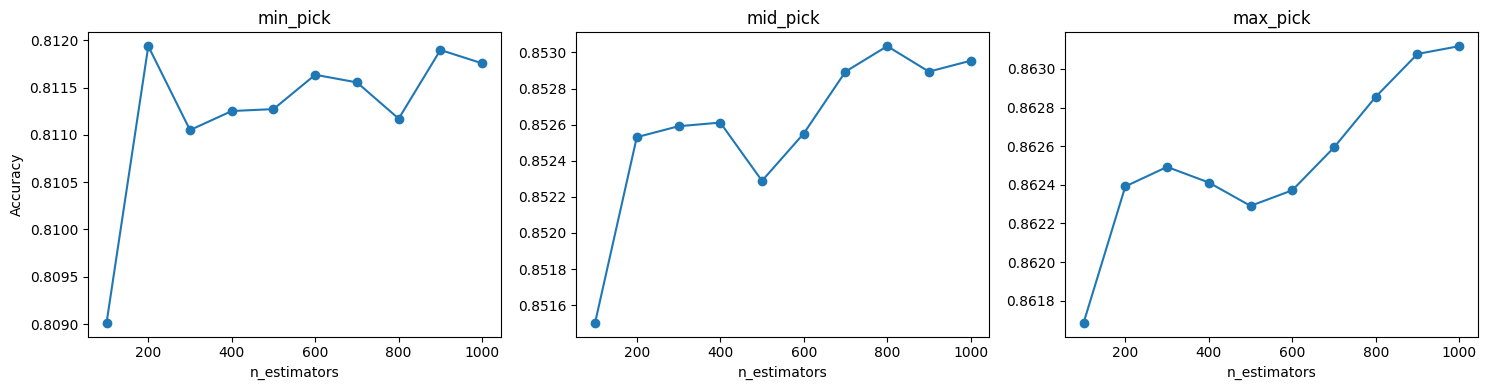

In [60]:
x1, y1 = zip(*results_min_pick_estimators)
x2, y2 = zip(*results_mid_pick_estimators)
x3, y3 = zip(*results_max_pick_estimators)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("n_estimators")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("n_estimators")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("n_estimators")

plt.tight_layout()
plt.show()

In [ ]:
"""
Nhận xét: Xu hướng tổng thể, độ chính xác tăng khi số lượng cây tăng, tối ưu sẽ từ 900-1000 cây
"""

In [ ]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100

"""

In [62]:
max_depth_values = [5, 10, 20, 25, 30, 40, 50]

In [63]:
# Danh sách lưu kết quả
results_min_pick_depth = []

for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        max_leaf_nodes=10,
        random_state=1,
        n_jobs=8  # Có thể điều chỉnh thành -1 để dùng toàn bộ CPU
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_depth = {depth}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_min_pick_depth.append((depth, acc))

max_depth = 5, CV acc = 0.8116, Valid acc = 0.8090
max_depth = 10, CV acc = 0.8143, Valid acc = 0.8144
max_depth = 20, CV acc = 0.8143, Valid acc = 0.8144
max_depth = 25, CV acc = 0.8143, Valid acc = 0.8144
max_depth = 30, CV acc = 0.8143, Valid acc = 0.8144
max_depth = 40, CV acc = 0.8143, Valid acc = 0.8144
max_depth = 50, CV acc = 0.8143, Valid acc = 0.8144


In [64]:
results_min_pick_depth

[(5, 0.8090139140955838),
 (10, 0.8144182294817504),
 (20, 0.8144182294817504),
 (25, 0.8144182294817504),
 (30, 0.8144182294817504),
 (40, 0.8144182294817504),
 (50, 0.8144182294817504)]

In [65]:
# Danh sách lưu kết quả
results_mid_pick_depth = []

for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=depth,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=50,
        random_state=1,
        n_jobs=8  # Có thể điều chỉnh thành -1 để dùng toàn bộ CPU
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_depth = {depth}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_depth.append((depth, acc))

max_depth = 5, CV acc = 0.8203, Valid acc = 0.8183
max_depth = 10, CV acc = 0.8529, Valid acc = 0.8518
max_depth = 20, CV acc = 0.8541, Valid acc = 0.8523
max_depth = 25, CV acc = 0.8541, Valid acc = 0.8523
max_depth = 30, CV acc = 0.8541, Valid acc = 0.8523
max_depth = 40, CV acc = 0.8541, Valid acc = 0.8523
max_depth = 50, CV acc = 0.8541, Valid acc = 0.8523


In [66]:
results_mid_pick_depth

[(5, 0.8183101431740271),
 (10, 0.8517846339987901),
 (20, 0.8522887678967533),
 (25, 0.8522887678967533),
 (30, 0.8522887678967533),
 (40, 0.8522887678967533),
 (50, 0.8522887678967533)]

In [67]:
# Danh sách lưu kết quả
results_max_pick_depth = []

for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=depth,
        min_samples_split=10,
        min_samples_leaf=5,
        max_leaf_nodes=100,
        random_state=1,
        n_jobs=8  # Có thể điều chỉnh thành -1 để dùng toàn bộ CPU
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_depth = {depth}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_depth.append((depth, acc))

max_depth = 5, CV acc = 0.8208, Valid acc = 0.8185
max_depth = 10, CV acc = 0.8608, Valid acc = 0.8595
max_depth = 20, CV acc = 0.8640, Valid acc = 0.8632
max_depth = 25, CV acc = 0.8641, Valid acc = 0.8631
max_depth = 30, CV acc = 0.8641, Valid acc = 0.8631
max_depth = 40, CV acc = 0.8641, Valid acc = 0.8631
max_depth = 50, CV acc = 0.8641, Valid acc = 0.8631


In [68]:
results_max_pick_depth

[(5, 0.8184714660213753),
 (10, 0.8595281306715064),
 (20, 0.8631982254486792),
 (25, 0.8631175640250051),
 (30, 0.8631175640250051),
 (40, 0.8631175640250051),
 (50, 0.8631175640250051)]

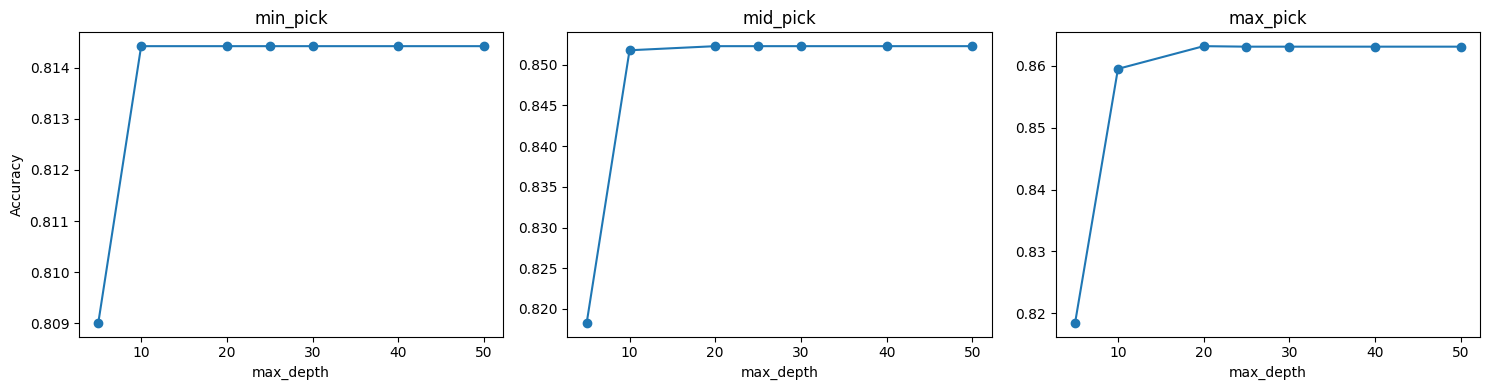

In [69]:
x1, y1 = zip(*results_min_pick_depth)
x2, y2 = zip(*results_mid_pick_depth)
x3, y3 = zip(*results_max_pick_depth)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("max_depth")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("max_depth")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("max_depth")

plt.tight_layout()
plt.show()

In [ ]:
"""
Nhẫn xét: Độ chính xác tăng khi max depth tăng, tuy nhiên, chỉ đạt đến max_depth = 20 là độ chính xác bắt đầu tăng rất chậm,
 cần phụ thuộc vào giá trị của các hyperparameter khác
 """

In [9]:
min_sample_split_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
# Danh sách lưu kết quả
results_min_pick_split = []

for sample_split in min_sample_split_values:
    # Khởi tạo mô hình với giá trị min_samples_split hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=sample_split,
        min_samples_leaf=1,
        max_leaf_nodes=10,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"min_samples_split = {sample_split}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_min_pick_split.append((sample_split, acc))



min_samples_split = 2, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 3, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 4, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 5, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 6, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 7, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 8, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 9, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 10, CV acc = 0.8116, Valid acc = 0.8090
min_samples_split = 20, CV acc = 0.8116, Valid acc = 0.8090


In [10]:
results_min_pick_split

[(2, 0.8090139140955838),
 (3, 0.8090139140955838),
 (4, 0.8090139140955838),
 (5, 0.8090139140955838),
 (6, 0.8090139140955838),
 (7, 0.8090139140955838),
 (8, 0.8090139140955838),
 (9, 0.8090139140955838),
 (10, 0.8090139140955838),
 (20, 0.8090139140955838)]

In [11]:
# Danh sách lưu kết quả
results_mid_pick_split = []

for sample_split in min_sample_split_values:
    # Khởi tạo mô hình với giá trị min_samples_split hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=sample_split,
        min_samples_leaf=3,
        max_leaf_nodes=50,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"min_samples_split = {sample_split}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_split.append((sample_split, acc))

min_samples_split = 2, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 3, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 4, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 5, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 6, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 7, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 8, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 9, CV acc = 0.8541, Valid acc = 0.8523
min_samples_split = 10, CV acc = 0.8541, Valid acc = 0.8523


In [12]:
results_mid_pick_split

[(2, 0.8522887678967533),
 (3, 0.8522887678967533),
 (4, 0.8522887678967533),
 (5, 0.8522887678967533),
 (6, 0.8522887678967533),
 (7, 0.8522887678967533),
 (8, 0.8522887678967533),
 (9, 0.8522887678967533),
 (10, 0.8522887678967533)]

In [13]:
# Danh sách lưu kết quả
results_max_pick_split = []

for sample_split in min_sample_split_values:
    # Khởi tạo mô hình với giá trị min_samples_split hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=50,
        min_samples_split=sample_split,
        min_samples_leaf=5,
        max_leaf_nodes=100,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"min_samples_split = {sample_split}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_split.append((sample_split, acc))

min_samples_split = 2, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 3, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 4, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 5, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 6, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 7, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 8, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 9, CV acc = 0.8641, Valid acc = 0.8631
min_samples_split = 10, CV acc = 0.8641, Valid acc = 0.8631


In [14]:
results_max_pick_split

[(2, 0.8631175640250051),
 (3, 0.8631175640250051),
 (4, 0.8631175640250051),
 (5, 0.8631175640250051),
 (6, 0.8631175640250051),
 (7, 0.8631175640250051),
 (8, 0.8631175640250051),
 (9, 0.8631175640250051),
 (10, 0.8631175640250051)]

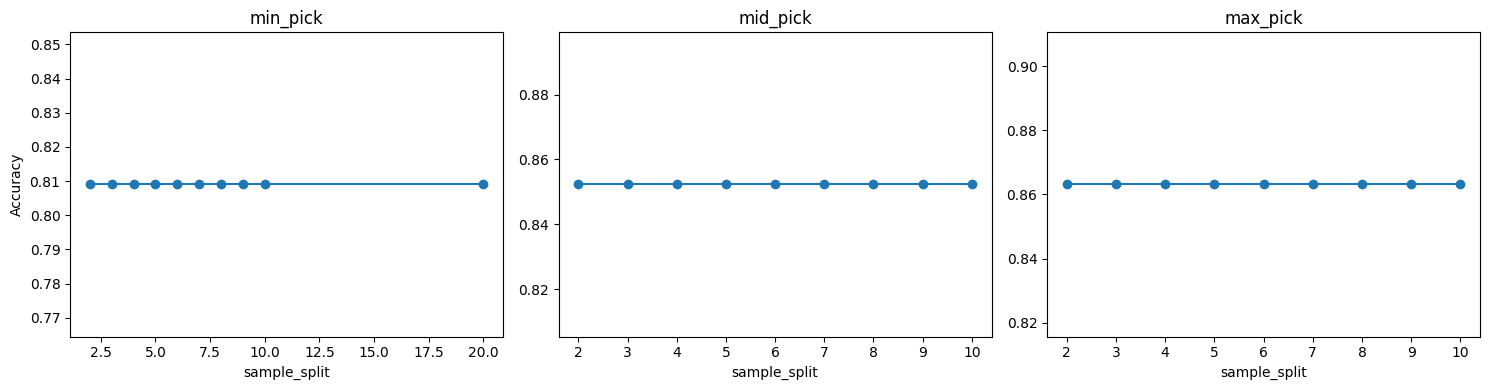

In [15]:
x1, y1 = zip(*results_min_pick_split)
x2, y2 = zip(*results_mid_pick_split)
x3, y3 = zip(*results_max_pick_split)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("sample_split")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("sample_split")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("sample_split")

plt.tight_layout()
plt.show()

In [ ]:
"""
Trong bộ dataset này, tham số sample_split không ảnh hưởng tới accuracy
"""

In [ ]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100

"""

In [16]:
min_sample_leaf_values = [1, 2, 3, 4, 5]

In [17]:
# Danh sách lưu kết quả
results_min_pick_leaf = []

for sample_leaf in min_sample_leaf_values:
    # Khởi tạo mô hình với min_samples_leaf hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=sample_leaf,
        max_leaf_nodes=10,
        random_state=1,
        n_jobs=8
    )
    
    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"min_samples_leaf = {sample_leaf}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_min_pick_leaf.append((sample_leaf, acc))


min_samples_leaf = 1, CV acc = 0.8116, Valid acc = 0.8090
min_samples_leaf = 2, CV acc = 0.8116, Valid acc = 0.8090
min_samples_leaf = 3, CV acc = 0.8116, Valid acc = 0.8090
min_samples_leaf = 4, CV acc = 0.8116, Valid acc = 0.8090
min_samples_leaf = 5, CV acc = 0.8116, Valid acc = 0.8090


In [22]:
results_min_pick_leaf

[(1, 0.8090139140955838),
 (2, 0.8090139140955838),
 (3, 0.8090139140955838),
 (4, 0.8090139140955838),
 (5, 0.8090139140955838)]

In [20]:
# Danh sách lưu kết quả
results_mid_pick_leaf = []

for sample_leaf in min_sample_leaf_values:
    # Khởi tạo mô hình với min_samples_leaf hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=sample_leaf,
        max_leaf_nodes=50,
        random_state=1,
        n_jobs=8
    )
    
    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"min_samples_leaf = {sample_leaf}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_leaf.append((sample_leaf, acc))

min_samples_leaf = 1, CV acc = 0.8541, Valid acc = 0.8523
min_samples_leaf = 2, CV acc = 0.8541, Valid acc = 0.8523
min_samples_leaf = 3, CV acc = 0.8541, Valid acc = 0.8523
min_samples_leaf = 4, CV acc = 0.8541, Valid acc = 0.8523
min_samples_leaf = 5, CV acc = 0.8541, Valid acc = 0.8523


In [21]:
results_mid_pick_leaf

[(1, 0.8522887678967533),
 (2, 0.8522887678967533),
 (3, 0.8522887678967533),
 (4, 0.8522887678967533),
 (5, 0.8522887678967533)]

In [18]:
# Danh sách lưu kết quả
results_max_pick_leaf = []

for sample_leaf in min_sample_leaf_values:
    # Khởi tạo mô hình với min_samples_leaf hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=sample_leaf,
        max_leaf_nodes=100,
        random_state=1,
        n_jobs=8
    )
    
    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"min_samples_leaf = {sample_leaf}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_leaf.append((sample_leaf, acc))

min_samples_leaf = 1, CV acc = 0.8640, Valid acc = 0.8631
min_samples_leaf = 2, CV acc = 0.8640, Valid acc = 0.8631
min_samples_leaf = 3, CV acc = 0.8640, Valid acc = 0.8631
min_samples_leaf = 4, CV acc = 0.8641, Valid acc = 0.8631
min_samples_leaf = 5, CV acc = 0.8641, Valid acc = 0.8631


In [19]:
results_max_pick_leaf

[(1, 0.8631175640250051),
 (2, 0.8631175640250051),
 (3, 0.8631175640250051),
 (4, 0.8631175640250051),
 (5, 0.8631175640250051)]

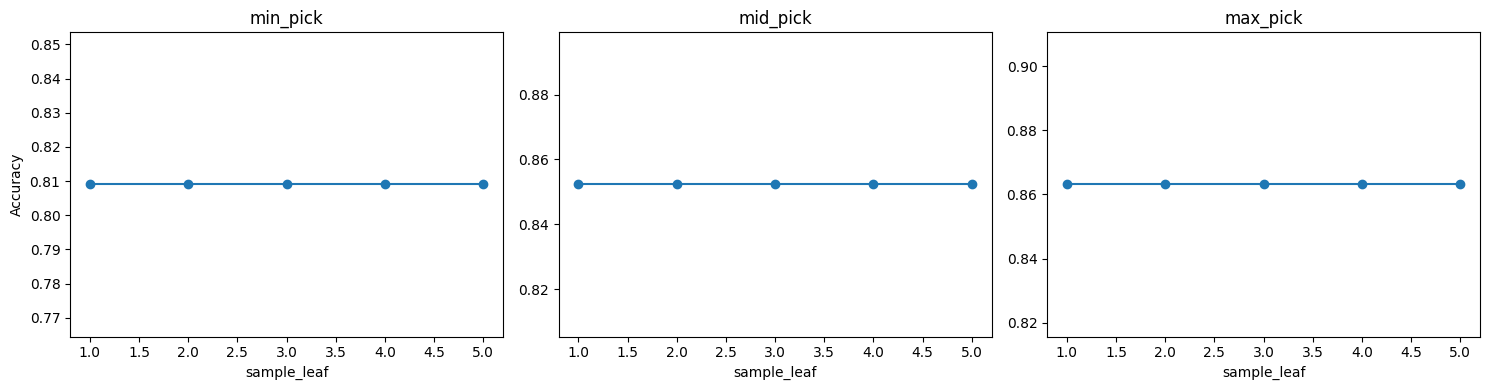

In [23]:
x1, y1 = zip(*results_min_pick_leaf)
x2, y2 = zip(*results_mid_pick_leaf)
x3, y3 = zip(*results_max_pick_leaf)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("sample_leaf")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("sample_leaf")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("sample_leaf")

plt.tight_layout()
plt.show()

In [ ]:
""""
Tương tự với sample_split
"""

In [24]:
max_leaf_nodes_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [25]:
# Danh sách lưu kết quả
results_min_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_min_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 10, CV acc = 0.8116, Valid acc = 0.8090
max_leaf_nodes = 20, CV acc = 0.8178, Valid acc = 0.8140
max_leaf_nodes = 30, CV acc = 0.8186, Valid acc = 0.8141
max_leaf_nodes = 40, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 50, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 60, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 70, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 80, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 90, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 100, CV acc = 0.8187, Valid acc = 0.8141


In [26]:
results_min_pick_node

[(10, 0.8090139140955838),
 (20, 0.8139745916515426),
 (30, 0.8140552530752168),
 (40, 0.8140552530752168),
 (50, 0.8140552530752168),
 (60, 0.8140552530752168),
 (70, 0.8140552530752168),
 (80, 0.8140552530752168),
 (90, 0.8140552530752168),
 (100, 0.8140552530752168)]

In [27]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 10, CV acc = 0.8155, Valid acc = 0.8143
max_leaf_nodes = 20, CV acc = 0.8308, Valid acc = 0.8294
max_leaf_nodes = 30, CV acc = 0.8422, Valid acc = 0.8395
max_leaf_nodes = 40, CV acc = 0.8510, Valid acc = 0.8489
max_leaf_nodes = 50, CV acc = 0.8541, Valid acc = 0.8523
max_leaf_nodes = 60, CV acc = 0.8562, Valid acc = 0.8546
max_leaf_nodes = 70, CV acc = 0.8582, Valid acc = 0.8563
max_leaf_nodes = 80, CV acc = 0.8604, Valid acc = 0.8590
max_leaf_nodes = 90, CV acc = 0.8624, Valid acc = 0.8609
max_leaf_nodes = 100, CV acc = 0.8639, Valid acc = 0.8622


In [28]:
results_mid_pick_node

[(10, 0.8143174027021577),
 (20, 0.8293607582173825),
 (30, 0.8395039322444041),
 (40, 0.848941318814277),
 (50, 0.8522887678967533),
 (60, 0.8545674531155475),
 (70, 0.8562613430127042),
 (80, 0.8590038314176245),
 (90, 0.860919540229885),
 (100, 0.8622302883645896)]

In [29]:
# Danh sách lưu kết quả
results_max_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=5,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 10, CV acc = 0.8149, Valid acc = 0.8143
max_leaf_nodes = 20, CV acc = 0.8304, Valid acc = 0.8294
max_leaf_nodes = 30, CV acc = 0.8424, Valid acc = 0.8403
max_leaf_nodes = 40, CV acc = 0.8510, Valid acc = 0.8500
max_leaf_nodes = 50, CV acc = 0.8542, Valid acc = 0.8530
max_leaf_nodes = 60, CV acc = 0.8566, Valid acc = 0.8552
max_leaf_nodes = 70, CV acc = 0.8584, Valid acc = 0.8571
max_leaf_nodes = 80, CV acc = 0.8607, Valid acc = 0.8589
max_leaf_nodes = 90, CV acc = 0.8625, Valid acc = 0.8620
max_leaf_nodes = 100, CV acc = 0.8641, Valid acc = 0.8631


In [30]:
results_max_pick_node

[(10, 0.8142770719903206),
 (20, 0.8293607582173825),
 (30, 0.8402500504133898),
 (40, 0.8500302480338778),
 (50, 0.8529542246420649),
 (60, 0.855192579149022),
 (70, 0.857128453317201),
 (80, 0.8589231699939504),
 (90, 0.8620084694494858),
 (100, 0.8631175640250051)]

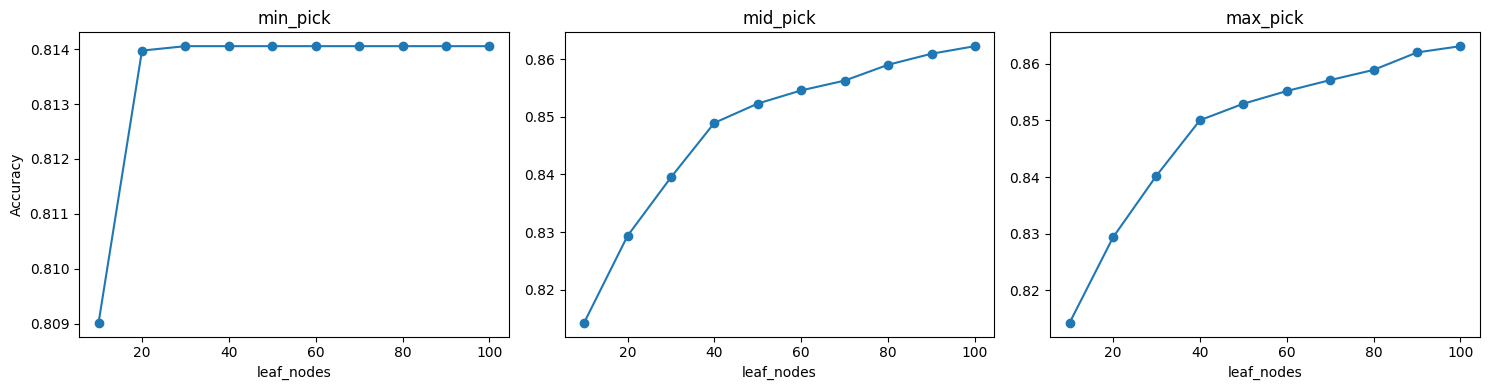

In [31]:
x1, y1 = zip(*results_min_pick_node)
x2, y2 = zip(*results_mid_pick_node)
x3, y3 = zip(*results_max_pick_node)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("leaf_nodes")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("leaf_nodes")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("leaf_nodes")

plt.tight_layout()
plt.show()

In [32]:
max_leaf_nodes_values = [110, 120, 130, 140, 150]

In [33]:
# Danh sách lưu kết quả
results_min_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_min_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 110, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 120, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 130, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 140, CV acc = 0.8187, Valid acc = 0.8141
max_leaf_nodes = 150, CV acc = 0.8187, Valid acc = 0.8141


In [34]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 110, CV acc = 0.8650, Valid acc = 0.8637
max_leaf_nodes = 120, CV acc = 0.8664, Valid acc = 0.8654
max_leaf_nodes = 130, CV acc = 0.8675, Valid acc = 0.8666
max_leaf_nodes = 140, CV acc = 0.8687, Valid acc = 0.8676
max_leaf_nodes = 150, CV acc = 0.8697, Valid acc = 0.8684


In [35]:
# Danh sách lưu kết quả
results_max_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=5,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 110, CV acc = 0.8652, Valid acc = 0.8642
max_leaf_nodes = 120, CV acc = 0.8663, Valid acc = 0.8658
max_leaf_nodes = 130, CV acc = 0.8676, Valid acc = 0.8668
max_leaf_nodes = 140, CV acc = 0.8687, Valid acc = 0.8679
max_leaf_nodes = 150, CV acc = 0.8696, Valid acc = 0.8691


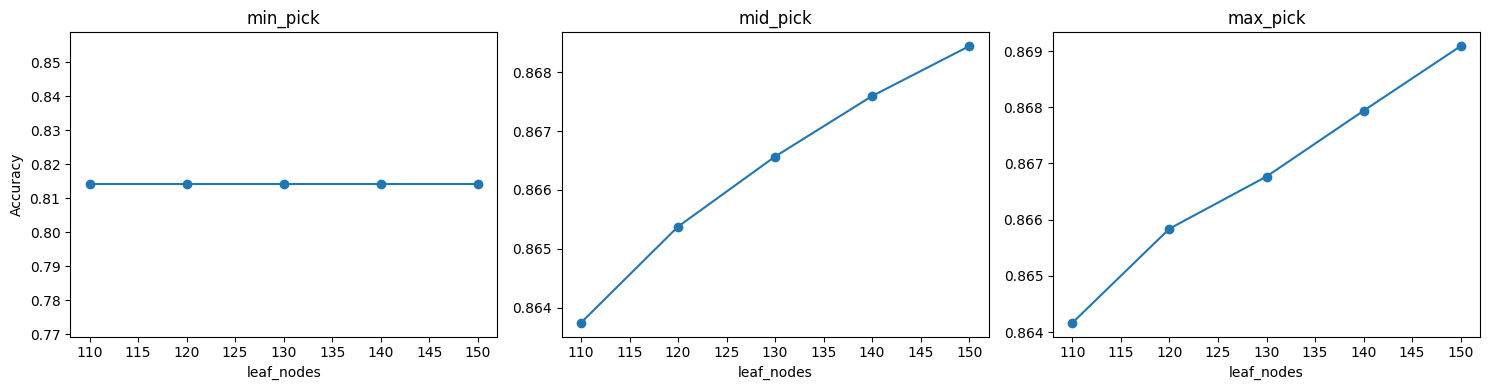

In [36]:
x1, y1 = zip(*results_min_pick_node)
x2, y2 = zip(*results_mid_pick_node)
x3, y3 = zip(*results_max_pick_node)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("leaf_nodes")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("leaf_nodes")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("leaf_nodes")

plt.tight_layout()
plt.show()

In [37]:
max_leaf_nodes_values = [160, 170, 180, 190, 200]

In [38]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 160, CV acc = 0.8706, Valid acc = 0.8692
max_leaf_nodes = 170, CV acc = 0.8715, Valid acc = 0.8700
max_leaf_nodes = 180, CV acc = 0.8722, Valid acc = 0.8709
max_leaf_nodes = 190, CV acc = 0.8729, Valid acc = 0.8716
max_leaf_nodes = 200, CV acc = 0.8736, Valid acc = 0.8721


In [39]:
max_leaf_nodes_values = [250, 300, 350, 400, 450, 500]

In [40]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 250, CV acc = 0.8776, Valid acc = 0.8758
max_leaf_nodes = 300, CV acc = 0.8800, Valid acc = 0.8785
max_leaf_nodes = 350, CV acc = 0.8821, Valid acc = 0.8807
max_leaf_nodes = 400, CV acc = 0.8842, Valid acc = 0.8828
max_leaf_nodes = 450, CV acc = 0.8861, Valid acc = 0.8846
max_leaf_nodes = 500, CV acc = 0.8876, Valid acc = 0.8860


In [41]:
max_leaf_nodes_values = [600, 700, 800, 900, 1000]

In [42]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 600, CV acc = 0.8901, Valid acc = 0.8889
max_leaf_nodes = 700, CV acc = 0.8923, Valid acc = 0.8904
max_leaf_nodes = 800, CV acc = 0.8938, Valid acc = 0.8923
max_leaf_nodes = 900, CV acc = 0.8957, Valid acc = 0.8941
max_leaf_nodes = 1000, CV acc = 0.8974, Valid acc = 0.8955


In [43]:
max_leaf_nodes_values = [1100, 1200, 1500, 1800, 2000]

In [44]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 1100, CV acc = 0.8989, Valid acc = 0.8966
max_leaf_nodes = 1200, CV acc = 0.9001, Valid acc = 0.8985
max_leaf_nodes = 1500, CV acc = 0.9035, Valid acc = 0.9021
max_leaf_nodes = 1800, CV acc = 0.9060, Valid acc = 0.9050
max_leaf_nodes = 2000, CV acc = 0.9075, Valid acc = 0.9068


In [47]:
max_leaf_nodes_values = [2500, 3000, 4000, 5000, 6000]

In [48]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 2500, CV acc = 0.9103, Valid acc = 0.9102
max_leaf_nodes = 3000, CV acc = 0.9123, Valid acc = 0.9123
max_leaf_nodes = 4000, CV acc = 0.9158, Valid acc = 0.9165
max_leaf_nodes = 5000, CV acc = 0.9180, Valid acc = 0.9190
max_leaf_nodes = 6000, CV acc = 0.9185, Valid acc = 0.9205


In [49]:
max_leaf_nodes_values = [7000, 8000, 9000, 10000]

In [50]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=500,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 7000, CV acc = 0.9185, Valid acc = 0.9210
max_leaf_nodes = 8000, CV acc = 0.9185, Valid acc = 0.9211
max_leaf_nodes = 9000, CV acc = 0.9185, Valid acc = 0.9211
max_leaf_nodes = 10000, CV acc = 0.9185, Valid acc = 0.9211


In [52]:
# Danh sách lưu kết quả
results_max_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=5,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 7000, CV acc = 0.9131, Valid acc = 0.9153
max_leaf_nodes = 8000, CV acc = 0.9131, Valid acc = 0.9153


KeyboardInterrupt: 

In [53]:
results_max_pick_node

[(7000, 0.9152853397862473), (8000, 0.9152853397862473)]

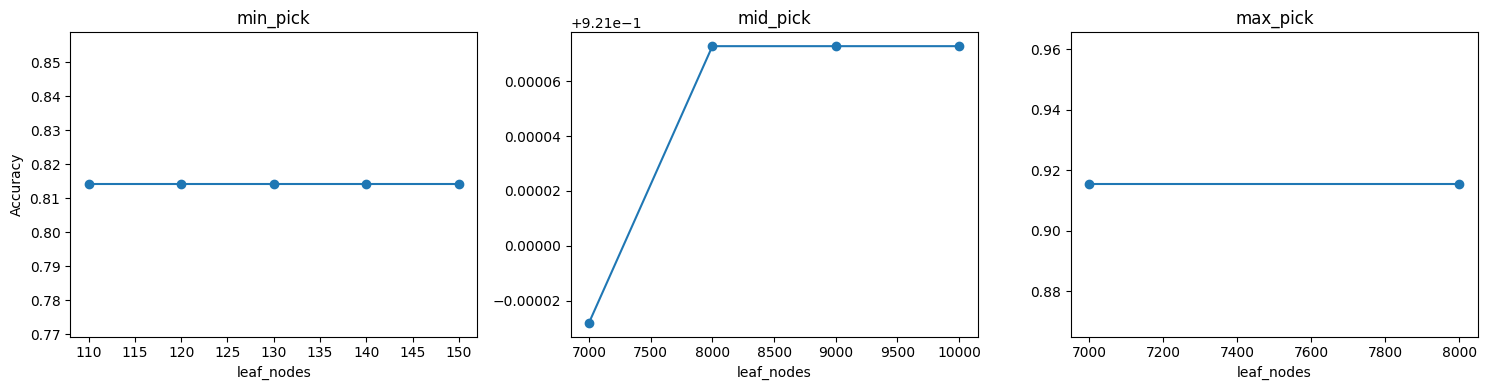

In [54]:
x1, y1 = zip(*results_min_pick_node)
x2, y2 = zip(*results_mid_pick_node)
x3, y3 = zip(*results_max_pick_node)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("leaf_nodes")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("leaf_nodes")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("leaf_nodes")

plt.tight_layout()
plt.show()

In [55]:
n_estimators_values = [1100, 1200, 1300, 1400, 1500]

In [56]:
# Danh sách lưu kết quả
results_min_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        max_leaf_nodes=10,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_min_pick_estimators.append((n_estimator, acc)) 

n_estimators = 1100, CV acc = 0.8123, Valid acc = 0.8118
n_estimators = 1200, CV acc = 0.8125, Valid acc = 0.8117
n_estimators = 1300, CV acc = 0.8119, Valid acc = 0.8116


KeyboardInterrupt: 

In [ ]:
"""
n_estimators = 1100, CV acc = 0.8123, Valid acc = 0.8118
n_estimators = 1200, CV acc = 0.8125, Valid acc = 0.8117
n_estimators = 1300, CV acc = 0.8119, Valid acc = 0.8116"""

In [ ]:
results_min_pick_estimators

In [ ]:
# Danh sách lưu kết quả
results_mid_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=25,
        min_samples_split=6,
        min_samples_leaf=3,
        max_leaf_nodes=50,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_mid_pick_estimators.append((n_estimator, acc)) 

In [ ]:
results_mid_pick_estimators

In [ ]:
# Danh sách lưu kết quả
results_max_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=25,
        min_samples_split=10,
        min_samples_leaf=5,
        max_leaf_nodes=8000,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_max_pick_estimators.append((n_estimator, acc)) 

In [ ]:
results_max_pick_estimators

In [ ]:
x1, y1 = zip(*results_min_pick_estimators)
x2, y2 = zip(*results_mid_pick_estimators)
x3, y3 = zip(*results_max_pick_estimators)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("n_estimators")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("n_estimators")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("n_estimators")

plt.tight_layout()
plt.show()

In [ ]:
rf_test_01 = RandomForestClassifier(n_estimators=1000, max_depth=25, max_leaf_nodes=8000, random_state=1)

In [ ]:
rf_test_01.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_leaf_nodes=8000, n_estimators=1000,
                       random_state=1)

In [ ]:
y_preds_01 = rf_test_01.predict(X_valid)

In [ ]:
# 10. Hiển thị kết quả
print(pd.DataFrame({'y': y_valid, 'y_preds': y_preds_01}))

        y  y_preds
242767  1        1
79237   0        0
197477  0        0
144729  1        1
143613  1        1
...    ..      ...
172407  0        0
106114  1        1
98805   0        0
38175   0        0
178870  0        0

[49590 rows x 2 columns]


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_preds_01))


Confusion Matrix:
[[24534  1049]
 [ 2237 21770]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds_01))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     25583
           1       0.95      0.91      0.93     24007

    accuracy                           0.93     49590
   macro avg       0.94      0.93      0.93     49590
weighted avg       0.93      0.93      0.93     49590



In [65]:
rf_test_02 = RandomForestClassifier(n_estimators=1500, max_depth=25, max_leaf_nodes=8000, random_state=1)
rf_test_02.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_leaf_nodes=8000, n_estimators=1500,
                       random_state=1)

In [66]:
y_preds_02 = rf_test_02.predict(X_valid)

In [67]:
# 10. Hiển thị kết quả
print(pd.DataFrame({'y': y_valid, 'y_preds': y_preds_02}))

        y  y_preds
242767  1        1
79237   0        0
197477  0        0
144729  1        1
143613  1        1
...    ..      ...
172407  0        0
106114  1        1
98805   0        0
38175   0        0
178870  0        0

[49590 rows x 2 columns]


In [68]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_preds_02))


Confusion Matrix:
[[24538  1045]
 [ 2250 21757]]


In [69]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds_02))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     25583
           1       0.95      0.91      0.93     24007

    accuracy                           0.93     49590
   macro avg       0.94      0.93      0.93     49590
weighted avg       0.93      0.93      0.93     49590



In [71]:
n_estimators_values = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

In [73]:
# Danh sách lưu kết quả
results_test_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=25,
        max_leaf_nodes=8000,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc:.4f}")
    results_test_pick_estimators.append((n_estimator, acc)) 

n_estimators = 1000, CV acc = 0.9328, Valid acc = 0.9337
n_estimators = 1100, CV acc = 0.9329, Valid acc = 0.9337
n_estimators = 1200, CV acc = 0.9328, Valid acc = 0.9338
n_estimators = 1300, CV acc = 0.9329, Valid acc = 0.9337
n_estimators = 1400, CV acc = 0.9328, Valid acc = 0.9336


KeyboardInterrupt: 

In [74]:
results_test_pick_estimators

[(1000, 0.933736640451704),
 (1100, 0.9336761443839484),
 (1200, 0.9337568058076225),
 (1300, 0.9337164750957855),
 (1400, 0.9335954829602743)]

In [ ]:
rf_test_03 = RandomForestClassifier(n_estimators=1200, max_depth=25, max_leaf_nodes=8000, random_state=1)
rf_test_03.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_leaf_nodes=8000, n_estimators=1200,
                       random_state=1)

In [81]:
y_preds_03 = rf_test_03.predict(X_valid)

In [82]:
# 10. Hiển thị kết quả
print(pd.DataFrame({'y': y_valid, 'y_preds': y_preds_03}))

        y  y_preds
242767  1        1
79237   0        0
197477  0        0
144729  1        1
143613  1        1
...    ..      ...
172407  0        0
106114  1        1
98805   0        0
38175   0        0
178870  0        0

[49590 rows x 2 columns]


In [83]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_preds_03))


Confusion Matrix:
[[24539  1044]
 [ 2241 21766]]


In [84]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds_03))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     25583
           1       0.95      0.91      0.93     24007

    accuracy                           0.93     49590
   macro avg       0.94      0.93      0.93     49590
weighted avg       0.93      0.93      0.93     49590



In [85]:
rf_sts = RandomForestClassifier(random_state=1)
rf_sts.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [87]:
y_preds_sts = rf_sts.predict(X_valid)

In [88]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_preds_sts))


Confusion Matrix:
[[24616   967]
 [ 1122 22885]]


In [90]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds_sts))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     25583
           1       0.96      0.95      0.96     24007

    accuracy                           0.96     49590
   macro avg       0.96      0.96      0.96     49590
weighted avg       0.96      0.96      0.96     49590



In [124]:
acc = accuracy_score(y_valid, y_preds_sts)
print(acc)

0.9578745714861867


In [113]:
rf_test_04 = RandomForestClassifier(n_estimators=1200, max_depth=50, max_leaf_nodes=8000, random_state=1)
rf_test_04.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_leaf_nodes=8000, n_estimators=1200,
                       random_state=1)

In [114]:
y_preds_04 = rf_test_04.predict(X_valid)

In [116]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds_04))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     25583
           1       0.95      0.92      0.93     24007

    accuracy                           0.94     49590
   macro avg       0.94      0.94      0.94     49590
weighted avg       0.94      0.94      0.94     49590



In [120]:
rf_test_05 = RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=20000, random_state=1)
rf_test_05.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=20000, random_state=1)

In [121]:
y_preds_05 = rf_test_05.predict(X_valid)

In [122]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds_05))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     25583
           1       0.96      0.95      0.96     24007

    accuracy                           0.96     49590
   macro avg       0.96      0.96      0.96     49590
weighted avg       0.96      0.96      0.96     49590



In [129]:
acc_05 = accuracy_score(y_valid, y_preds_05)
print(acc_05)

0.9582173825368018


In [ ]:
rf_test_06 = RandomForestClassifier(n_estimators=200, max_depth=100, max_leaf_nodes=20000, random_state=1)
rf_test_06.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=20000, n_estimators=200,
                       random_state=1)

In [127]:
y_preds_06 = rf_test_06.predict(X_valid)

In [130]:
acc_06 = accuracy_score(y_valid, y_preds_06)
print(acc_06)

0.958035894333535


In [131]:
rf_test_07 = RandomForestClassifier(n_estimators=150, max_depth=100, max_leaf_nodes=15000, random_state=1)
rf_test_07.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=15000, n_estimators=150,
                       random_state=1)

In [132]:
y_preds_07 = rf_test_07.predict(X_valid)

In [133]:
acc_07 = accuracy_score(y_valid, y_preds_07)
print(acc_07)

0.9556765476910668


In [134]:
rf_test_08 = RandomForestClassifier(n_estimators=200, max_depth=100, max_leaf_nodes=50000, random_state=1)
rf_test_08.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=50000, n_estimators=200,
                       random_state=1)

In [135]:
y_preds_08 = rf_test_08.predict(X_valid)

In [136]:
acc_08 = accuracy_score(y_valid, y_preds_08)
print(acc_08)

0.958035894333535


In [137]:
max_leaf_nodes_values = [15000, 16000, 17000, 18000, 19000, 20000]

In [138]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=100,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 15000, CV acc = 0.9491, Valid acc = 0.9555353901996371
max_leaf_nodes = 16000, CV acc = 0.9489, Valid acc = 0.9568259729784231
max_leaf_nodes = 17000, CV acc = 0.9489, Valid acc = 0.9579149021980238
max_leaf_nodes = 18000, CV acc = 0.9489, Valid acc = 0.9581972171808832
max_leaf_nodes = 19000, CV acc = 0.9489, Valid acc = 0.9582173825368018
max_leaf_nodes = 20000, CV acc = 0.9489, Valid acc = 0.9582173825368018


In [139]:
n_estimators_values = [100, 150, 200, 250, 300]

In [140]:
# Danh sách lưu kết quả
results_min_pick_estimators = []

for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với giá trị n_estimators hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=n_estimator,
        max_depth=100,
        max_leaf_nodes=20000,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả (có thể in thêm nếu muốn)
    print(f"n_estimators = {n_estimator}, CV acc = {cv_mean:.4f}, Valid acc = {acc}")
    results_min_pick_estimators.append((n_estimator, acc)) 

n_estimators = 100, CV acc = 0.9489, Valid acc = 0.9582173825368018
n_estimators = 150, CV acc = 0.9489, Valid acc = 0.9582577132486388
n_estimators = 200, CV acc = 0.9490, Valid acc = 0.958035894333535
n_estimators = 250, CV acc = 0.9489, Valid acc = 0.9580560596894535
n_estimators = 300, CV acc = 0.9489, Valid acc = 0.9582173825368018


In [143]:
max_depth_values = [20, 30, 40, 50]

In [144]:
# Danh sách lưu kết quả
results_max_pick_depth = []

for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=150,
        max_depth=depth,
        max_leaf_nodes=20000,
        random_state=1,
        n_jobs=8  # Có thể điều chỉnh thành -1 để dùng toàn bộ CPU
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_depth = {depth}, CV acc = {cv_mean:.4f}, Valid acc = {acc}")
    results_max_pick_depth.append((depth, acc))

max_depth = 20, CV acc = 0.9222, Valid acc = 0.9228473482556967
max_depth = 30, CV acc = 0.9443, Valid acc = 0.950796531558782
max_depth = 40, CV acc = 0.9487, Valid acc = 0.9575519257914902
max_depth = 50, CV acc = 0.9490, Valid acc = 0.958076225045372


In [145]:
max_depth_values = [60, 70, 80, 90]

In [146]:
# Danh sách lưu kết quả
results_max_pick_depth = []

for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=150,
        max_depth=depth,
        max_leaf_nodes=20000,
        random_state=1,
        n_jobs=8  # Có thể điều chỉnh thành -1 để dùng toàn bộ CPU
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_depth = {depth}, CV acc = {cv_mean:.4f}, Valid acc = {acc}")
    results_max_pick_depth.append((depth, acc))

max_depth = 60, CV acc = 0.9489, Valid acc = 0.9582577132486388
max_depth = 70, CV acc = 0.9489, Valid acc = 0.9582577132486388


KeyboardInterrupt: 

In [147]:
max_depth_values = [51, 52, 53, 54, 55, 56, 57, 58, 59]

In [148]:
# Danh sách lưu kết quả
results_max_pick_depth = []

for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=150,
        max_depth=depth,
        max_leaf_nodes=20000,
        random_state=1,
        n_jobs=8  # Có thể điều chỉnh thành -1 để dùng toàn bộ CPU
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_depth = {depth}, CV acc = {cv_mean:.4f}, Valid acc = {acc}")
    results_max_pick_depth.append((depth, acc))

max_depth = 51, CV acc = 0.9489, Valid acc = 0.9580157289776164
max_depth = 52, CV acc = 0.9490, Valid acc = 0.9581367211131276
max_depth = 53, CV acc = 0.9490, Valid acc = 0.9583182093163944
max_depth = 54, CV acc = 0.9489, Valid acc = 0.9581367211131276


KeyboardInterrupt: 

In [149]:
results_max_pick_depth

[(51, 0.9580157289776164),
 (52, 0.9581367211131276),
 (53, 0.9583182093163944),
 (54, 0.9581367211131276)]

In [150]:
max_leaf_nodes_values = [19000, 19100, 19200, 19300, 19400, 19500]

In [151]:
# Danh sách lưu kết quả
results_mid_pick_node = []

for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_leaf_nodes hiện tại
    rf_model = RandomForestClassifier(
        n_estimators=150,
        max_depth=53,
        max_leaf_nodes=leaf_nodes,
        random_state=1,
        n_jobs=8
    )

    # Cross-validation trên X_train (5-fold)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=8)
    cv_mean = cv_scores.mean()

    # Huấn luyện lại mô hình trên toàn bộ X_train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên X_valid
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)

    # In và lưu kết quả
    print(f"max_leaf_nodes = {leaf_nodes}, CV acc = {cv_mean:.4f}, Valid acc = {acc}")
    results_mid_pick_node.append((leaf_nodes, acc))


max_leaf_nodes = 19000, CV acc = 0.9490, Valid acc = 0.9583182093163944
max_leaf_nodes = 19100, CV acc = 0.9490, Valid acc = 0.9583182093163944
max_leaf_nodes = 19200, CV acc = 0.9490, Valid acc = 0.9583182093163944


KeyboardInterrupt: 

In [152]:
results_mid_pick_node

[(19000, 0.9583182093163944),
 (19100, 0.9583182093163944),
 (19200, 0.9583182093163944)]

In [153]:
rf_test_09 = RandomForestClassifier(n_estimators=150, max_depth=53, max_leaf_nodes=20000, random_state=1)
rf_test_09.fit(X_train, y_train)

RandomForestClassifier(max_depth=53, max_leaf_nodes=20000, n_estimators=150,
                       random_state=1)

In [154]:
y_preds_09 = rf_test_09.predict(X_valid)

In [155]:
acc_09 = accuracy_score(y_valid, y_preds_09)
print(acc_09)

0.9583182093163944


In [156]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds_09))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     25583
           1       0.96      0.95      0.96     24007

    accuracy                           0.96     49590
   macro avg       0.96      0.96      0.96     49590
weighted avg       0.96      0.96      0.96     49590

